In [22]:
# importig the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from wordcloud import WordCloud

In [23]:
twitter_non_advert=pd.read_csv("/content/Twitter_Non-Advert.csv") # loading the dataset

In [24]:
twitter_non_advert.head() # printing the first five rows of the dataset

,text,label
0,speak-no-evil monkey Can I Be Honest With You...,1
1,Frau Goebbels early signs of psychosis psychot...,1
2,A lot of work and unfulfilled tasks plunge you...,1
3,Private health insurance delivers value for yo...,1
4,XpertOnline offers you the convenience of view...,1


In [25]:
twitter_non_advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2051 non-null   object
 1   label   2051 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 32.2+ KB


In [26]:
twitter_non_advert.isnull().sum() # checking for the null values

,0
text,0
label,0


In [27]:
twitter_non_advert['text']=twitter_non_advert['text'].str.lower()

In [28]:
twitter_non_advert.duplicated().sum()

np.int64(79)

In [29]:
twitter_non_advert=twitter_non_advert.drop_duplicates()

In [30]:
twitter_non_advert.duplicated().sum()

np.int64(0)

In [31]:
twitter_non_advert['label'].value_counts()

,count
label,
1,1212
0,760


In [32]:
twitter_non_advert['label'].value_counts(normalize=True) * 100

,proportion
label,
1,61.460446
0,38.539554


In [33]:
twitter_non_advert['text']=twitter_non_advert['text'].str.lower()

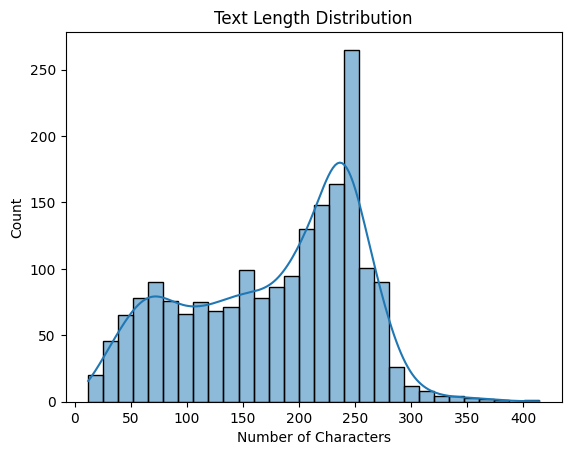

In [34]:
twitter_non_advert['text_length'] = twitter_non_advert['text'].apply(len)
sns.histplot(twitter_non_advert['text_length'], bins=30, kde=True)
plt.title("Text Length Distribution")
plt.xlabel("Number of Characters")
plt.show()

In [35]:
stress_text = " ".join(twitter_non_advert[twitter_non_advert['label'] == 1]['text'])
nonstress_text = " ".join(twitter_non_advert[twitter_non_advert['label'] == 0]['text'])

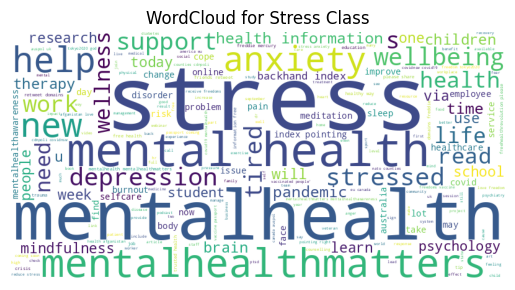

In [36]:
wc = WordCloud(width=800, height=400, background_color='white').generate(stress_text)
plt.imshow(wc)
plt.axis('off')
plt.title("WordCloud for Stress Class")
plt.show()

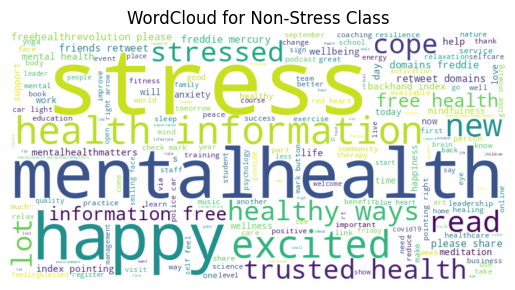

In [37]:
wc = WordCloud(width=800, height=400, background_color='white').generate(nonstress_text)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for Non-Stress Class")
plt.show()

In [38]:
# importig the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [39]:
twitter_non_advert['text']=twitter_non_advert['text'].str.lower()

In [40]:
twitter_non_advert['text']=twitter_non_advert['text'].str.replace(r'\d+', '', regex=True) #remove numbers
twitter_non_advert.head(10)

,text,label,text_length
0,speak-no-evil monkey can i be honest with you...,1,227
1,frau goebbels early signs of psychosis psychot...,1,79
2,a lot of work and unfulfilled tasks plunge you...,1,255
3,private health insurance delivers value for yo...,1,158
4,xpertonline offers you the convenience of view...,1,244
5,the september issue is out! explore our editor...,1,234
6,presenting a short guided meditation by that w...,0,203
7,stressed out? read on the healthy ways to cope...,0,240
8,stressed out? read on the healthy ways to cope...,1,240
9,key elements of good time management ... make ...,0,291


In [41]:
twitter_non_advert['text'] = twitter_non_advert['text'].str.replace(r'[^\w\s]', '', regex=True) # removes punctuation
twitter_non_advert.head(10)

,text,label,text_length
0,speaknoevil monkey can i be honest with you g...,1,227
1,frau goebbels early signs of psychosis psychot...,1,79
2,a lot of work and unfulfilled tasks plunge you...,1,255
3,private health insurance delivers value for yo...,1,158
4,xpertonline offers you the convenience of view...,1,244
5,the september issue is out explore our editors...,1,234
6,presenting a short guided meditation by that w...,0,203
7,stressed out read on the healthy ways to cope ...,0,240
8,stressed out read on the healthy ways to cope ...,1,240
9,key elements of good time management make a t...,0,291


In [42]:
twitter_non_advert['text'] = twitter_non_advert['text'].apply(word_tokenize)

In [43]:
stop_words = set(stopwords.words('english'))
def removestopwords(tokens):
    return [w for w in tokens if w.lower() not in stop_words]
twitter_non_advert['text'] = twitter_non_advert['text'].apply(removestopwords)

In [44]:
twitter_non_advert['text'] = twitter_non_advert['text'].apply(lambda tokens: ' '.join(tokens))

In [45]:
twitter_non_advert.head(10)

,text,label,text_length
0,speaknoevil monkey honest globe showing europe...,1,227
1,frau goebbels early signs psychosis psychotic ...,1,79
2,lot work unfulfilled tasks plunge extreme stre...,1,255
3,private health insurance delivers value young ...,1,158
4,xpertonline offers convenience viewing patient...,1,244
5,september issue explore editors picks associat...,1,234
6,presenting short guided meditation reduce stre...,0,203
7,stressed read healthy ways cope stress lot tru...,0,240
8,stressed read healthy ways cope stress lot tru...,1,240
9,key elements good time management make todo li...,0,291


In [46]:
# importig the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

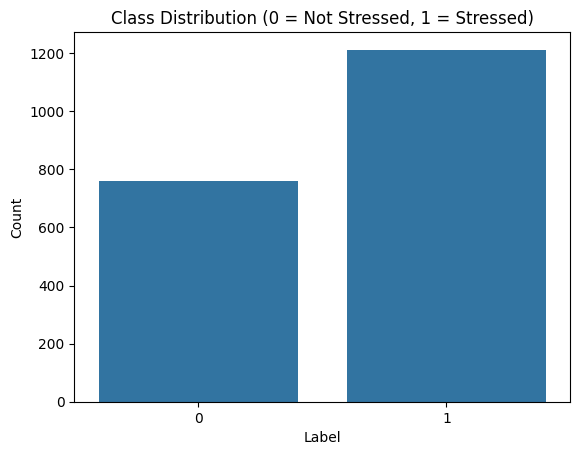

In [47]:
# Class distribution
sns.countplot(x='label', data=twitter_non_advert)
plt.title("Class Distribution (0 = Not Stressed, 1 = Stressed)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

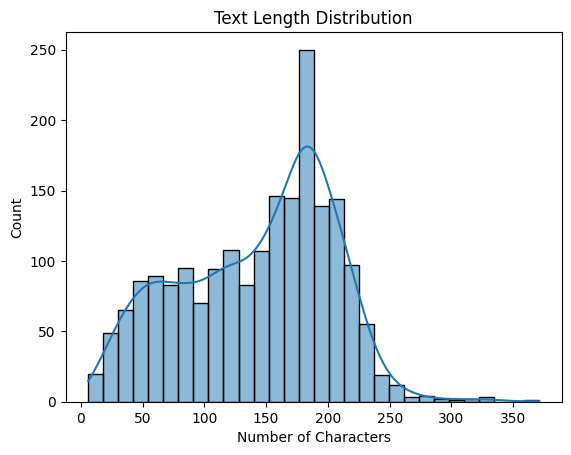

In [48]:
# Text length distribution
twitter_non_advert['text_length'] = twitter_non_advert['text'].apply(len)
sns.histplot(twitter_non_advert['text_length'], bins=30, kde=True)
plt.title("Text Length Distribution")
plt.xlabel("Number of Characters")
plt.show()

In [49]:
import pandas as pd
import re
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [50]:
train_df, test_df = train_test_split(twitter_non_advert, test_size=0.2)

In [51]:
from transformers import AutoTokenizer
from datasets import Dataset

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

def preprocess_function(examples):
    return tokenizer(examples['text'], truncation=True, padding=True, max_length=512)

# Convert pandas DataFrames to Hugging Face Datasets
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

tokenized_train = train_dataset.map(preprocess_function, batched=True)
tokenized_test = test_dataset.map(preprocess_function, batched=True)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/1577 [00:00<?, ? examples/s]

Map:   0%|          | 0/395 [00:00<?, ? examples/s]

In [53]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [58]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    logging_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=500,
    report_to="none",
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test,
    tokenizer=tokenizer,
)

trainer.train()

/tmp/ipython-input-966030080.py:17: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss
1,0.259300,0.415306
2,0.179900,0.387137
3,0.125200,0.410819


TrainOutput(global_step=150, training_loss=0.18811127026875815, metrics={'train_runtime': 40.4014, 'train_samples_per_second': 117.1, 'train_steps_per_second': 3.713, 'total_flos': 85682086743960.0, 'train_loss': 0.18811127026875815, 'epoch': 3.0})

In [59]:
results = trainer.evaluate()
print(f"Evaluation Results: {results}")

Evaluation Results: {'eval_loss': 0.4108192026615143, 'eval_runtime': 0.7625, 'eval_samples_per_second': 518.055, 'eval_steps_per_second': 17.05, 'epoch': 3.0}


In [60]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Get predictions (logits) from the trainer on test dataset
predictions_output = trainer.predict(tokenized_test)

# predictions_output.predictions are logits; get predicted classes by taking argmax
y_pred = np.argmax(predictions_output.predictions, axis=1)

# True labels
y_true = predictions_output.label_ids

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[126  28]
 [ 28 213]]


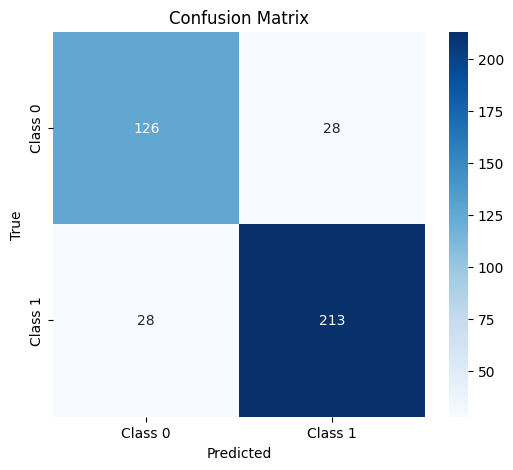

In [61]:
from sklearn.metrics import confusion_matrix
# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
